In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

Using TensorFlow backend.


In [2]:
import os
fn = []
num = []
for dirname, _, filenames in os.walk('chest_xray'):
    i=0
    for filename in filenames:
        print(os.path.join(dirname, filename))
        i=i+1
    fn.append(dirname)
    num.append(i)

chest_xray\test\NORMAL\IM-0001-0001.jpeg
chest_xray\test\NORMAL\IM-0003-0001.jpeg
chest_xray\test\NORMAL\IM-0005-0001.jpeg
chest_xray\test\NORMAL\IM-0006-0001.jpeg
chest_xray\test\NORMAL\IM-0007-0001.jpeg
chest_xray\test\NORMAL\IM-0009-0001.jpeg
chest_xray\test\NORMAL\IM-0010-0001.jpeg
chest_xray\test\NORMAL\IM-0011-0001-0001.jpeg
chest_xray\test\NORMAL\IM-0011-0001-0002.jpeg
chest_xray\test\NORMAL\IM-0011-0001.jpeg
chest_xray\test\NORMAL\IM-0013-0001.jpeg
chest_xray\test\NORMAL\IM-0015-0001.jpeg
chest_xray\test\NORMAL\IM-0016-0001.jpeg
chest_xray\test\NORMAL\IM-0017-0001.jpeg
chest_xray\test\NORMAL\IM-0019-0001.jpeg
chest_xray\test\NORMAL\IM-0021-0001.jpeg
chest_xray\test\NORMAL\IM-0022-0001.jpeg
chest_xray\test\NORMAL\IM-0023-0001.jpeg
chest_xray\test\NORMAL\IM-0025-0001.jpeg
chest_xray\test\NORMAL\IM-0027-0001.jpeg
chest_xray\test\NORMAL\IM-0028-0001.jpeg
chest_xray\test\NORMAL\IM-0029-0001.jpeg
chest_xray\test\NORMAL\IM-0030-0001.jpeg
chest_xray\test\NORMAL\IM-0031-0001.jpeg
chest_

chest_xray\train\NORMAL\IM-0289-0001.jpeg
chest_xray\train\NORMAL\IM-0290-0001.jpeg
chest_xray\train\NORMAL\IM-0291-0001.jpeg
chest_xray\train\NORMAL\IM-0292-0001.jpeg
chest_xray\train\NORMAL\IM-0293-0001.jpeg
chest_xray\train\NORMAL\IM-0294-0001.jpeg
chest_xray\train\NORMAL\IM-0295-0001.jpeg
chest_xray\train\NORMAL\IM-0297-0001.jpeg
chest_xray\train\NORMAL\IM-0298-0001.jpeg
chest_xray\train\NORMAL\IM-0299-0001.jpeg
chest_xray\train\NORMAL\IM-0300-0001.jpeg
chest_xray\train\NORMAL\IM-0301-0001.jpeg
chest_xray\train\NORMAL\IM-0302-0001.jpeg
chest_xray\train\NORMAL\IM-0303-0001.jpeg
chest_xray\train\NORMAL\IM-0304-0001.jpeg
chest_xray\train\NORMAL\IM-0305-0001.jpeg
chest_xray\train\NORMAL\IM-0306-0001.jpeg
chest_xray\train\NORMAL\IM-0307-0001.jpeg
chest_xray\train\NORMAL\IM-0308-0001.jpeg
chest_xray\train\NORMAL\IM-0309-0001.jpeg
chest_xray\train\NORMAL\IM-0311-0001.jpeg
chest_xray\train\NORMAL\IM-0312-0001.jpeg
chest_xray\train\NORMAL\IM-0313-0001.jpeg
chest_xray\train\NORMAL\IM-0314-00

chest_xray\train\PNEUMONIA\person1000_bacteria_2931.jpeg
chest_xray\train\PNEUMONIA\person1000_virus_1681.jpeg
chest_xray\train\PNEUMONIA\person1001_bacteria_2932.jpeg
chest_xray\train\PNEUMONIA\person1002_bacteria_2933.jpeg
chest_xray\train\PNEUMONIA\person1003_bacteria_2934.jpeg
chest_xray\train\PNEUMONIA\person1003_virus_1685.jpeg
chest_xray\train\PNEUMONIA\person1004_bacteria_2935.jpeg
chest_xray\train\PNEUMONIA\person1004_virus_1686.jpeg
chest_xray\train\PNEUMONIA\person1005_bacteria_2936.jpeg
chest_xray\train\PNEUMONIA\person1005_virus_1688.jpeg
chest_xray\train\PNEUMONIA\person1006_bacteria_2937.jpeg
chest_xray\train\PNEUMONIA\person1007_bacteria_2938.jpeg
chest_xray\train\PNEUMONIA\person1007_virus_1690.jpeg
chest_xray\train\PNEUMONIA\person1008_bacteria_2939.jpeg
chest_xray\train\PNEUMONIA\person1008_virus_1691.jpeg
chest_xray\train\PNEUMONIA\person1009_virus_1694.jpeg
chest_xray\train\PNEUMONIA\person100_virus_184.jpeg
chest_xray\train\PNEUMONIA\person1010_bacteria_2941.jpeg


chest_xray\train\PNEUMONIA\person374_virus_757.jpeg
chest_xray\train\PNEUMONIA\person375_bacteria_1713.jpeg
chest_xray\train\PNEUMONIA\person375_virus_758.jpeg
chest_xray\train\PNEUMONIA\person376_bacteria_1715.jpeg
chest_xray\train\PNEUMONIA\person376_bacteria_1716.jpeg
chest_xray\train\PNEUMONIA\person376_virus_759.jpeg
chest_xray\train\PNEUMONIA\person377_bacteria_1717.jpeg
chest_xray\train\PNEUMONIA\person377_bacteria_1718.jpeg
chest_xray\train\PNEUMONIA\person377_virus_760.jpeg
chest_xray\train\PNEUMONIA\person378_virus_761.jpeg
chest_xray\train\PNEUMONIA\person379_bacteria_1721.jpeg
chest_xray\train\PNEUMONIA\person379_bacteria_1722.jpeg
chest_xray\train\PNEUMONIA\person379_virus_762.jpeg
chest_xray\train\PNEUMONIA\person37_bacteria_186.jpeg
chest_xray\train\PNEUMONIA\person37_bacteria_187.jpeg
chest_xray\train\PNEUMONIA\person37_bacteria_188.jpeg
chest_xray\train\PNEUMONIA\person37_bacteria_189.jpeg
chest_xray\train\PNEUMONIA\person380_virus_763.jpeg
chest_xray\train\PNEUMONIA\p

chest_xray\train\PNEUMONIA\person916_bacteria_2841.jpeg
chest_xray\train\PNEUMONIA\person917_bacteria_2842.jpeg
chest_xray\train\PNEUMONIA\person918_bacteria_2843.jpeg
chest_xray\train\PNEUMONIA\person918_virus_1575.jpeg
chest_xray\train\PNEUMONIA\person919_bacteria_2844.jpeg
chest_xray\train\PNEUMONIA\person919_virus_1576.jpeg
chest_xray\train\PNEUMONIA\person920_bacteria_2845.jpeg
chest_xray\train\PNEUMONIA\person920_virus_1577.jpeg
chest_xray\train\PNEUMONIA\person921_bacteria_2846.jpeg
chest_xray\train\PNEUMONIA\person921_virus_1578.jpeg
chest_xray\train\PNEUMONIA\person922_bacteria_2847.jpeg
chest_xray\train\PNEUMONIA\person923_bacteria_2848.jpeg
chest_xray\train\PNEUMONIA\person924_bacteria_2849.jpeg
chest_xray\train\PNEUMONIA\person924_virus_1581.jpeg
chest_xray\train\PNEUMONIA\person925_bacteria_2850.jpeg
chest_xray\train\PNEUMONIA\person925_virus_1582.jpeg
chest_xray\train\PNEUMONIA\person926_virus_1583.jpeg
chest_xray\train\PNEUMONIA\person927_bacteria_2852.jpeg
chest_xray\tr

In [15]:
for i in range(10):
    print(fn[i], num[i])

chest_xray 0
chest_xray\test 0
chest_xray\test\NORMAL 234
chest_xray\test\PNEUMONIA 390
chest_xray\train 0
chest_xray\train\NORMAL 1341
chest_xray\train\PNEUMONIA 3875
chest_xray\val 0
chest_xray\val\NORMAL 8
chest_xray\val\PNEUMONIA 8


In [3]:
datagen = ImageDataGenerator (
            rescale = 1./255, 
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True
            )

In [4]:
images_dir = 'chest_xray/'

In [5]:
# load the data using data generators
train_generator  =    datagen.flow_from_directory(
                             images_dir + 'train',
                             seed=42,
                             target_size = (200,200),
                             batch_size =624 ,               
                             class_mode = 'binary',
                            )

test_generator = datagen.flow_from_directory(
                             images_dir + 'test' ,
                             seed=42, 
                             target_size = (200,200),
                             batch_size = 624 ,               
                             class_mode = 'binary',
                             shuffle = False
                            )

Validation_generator = datagen.flow_from_directory(
                             images_dir + 'val' ,
                             seed=42, 
                             target_size = (200,200),
                             batch_size = 624 ,               
                             class_mode = 'binary',
                            )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# First

In [7]:
model=Sequential()

#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(32,(3,3),input_shape=(200,200,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#The Third convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#Flatten layer to stack the output convolutions from convolution layer
model.add(Flatten())

#Dense layer of 256 neurons
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 97, 97, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 128)      

In [6]:
# ReduceLROnPlateau reduces Learning rate when there is no change in the parameter passed in moniter
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='auto')

In [21]:
history = model.fit_generator(
                    train_generator ,
                    epochs = 10,
                    validation_data = Validation_generator,
                    callbacks = [learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
163/163 [==============================] - 424s 3s/step - loss: 0.3813 - accuracy: 0.8321 - val_loss: 0.9392 - val_accuracy: 0.5625
Epoch 2/10
163/163 [==============================] - 387s 2s/step - loss: 0.2375 - accuracy: 0.9066 - val_loss: 1.1825 - val_accuracy: 0.5625
Epoch 3/10
163/163 [==============================] - 388s 2s/step - loss: 0.2117 - accuracy: 0.9179 - val_loss: 0.4609 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 372s 2s/step - loss: 0.1769 - accuracy: 0.9329 - val_loss: 1.2556 - val_accuracy: 0.6875
Epoch 5/10
163/163 [==============================] - 369s 2s/step - loss: 0.1805 - accuracy: 0.9281 - val_loss: 2.1920 - val_accuracy: 0.6250

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 6/10
163/163 [==============================] - 382s 2s/step - loss: 0.1420 - accuracy: 0.9465 - val_loss: 1.2535 - val_accuracy: 0.6250
Epoch 7/10
16

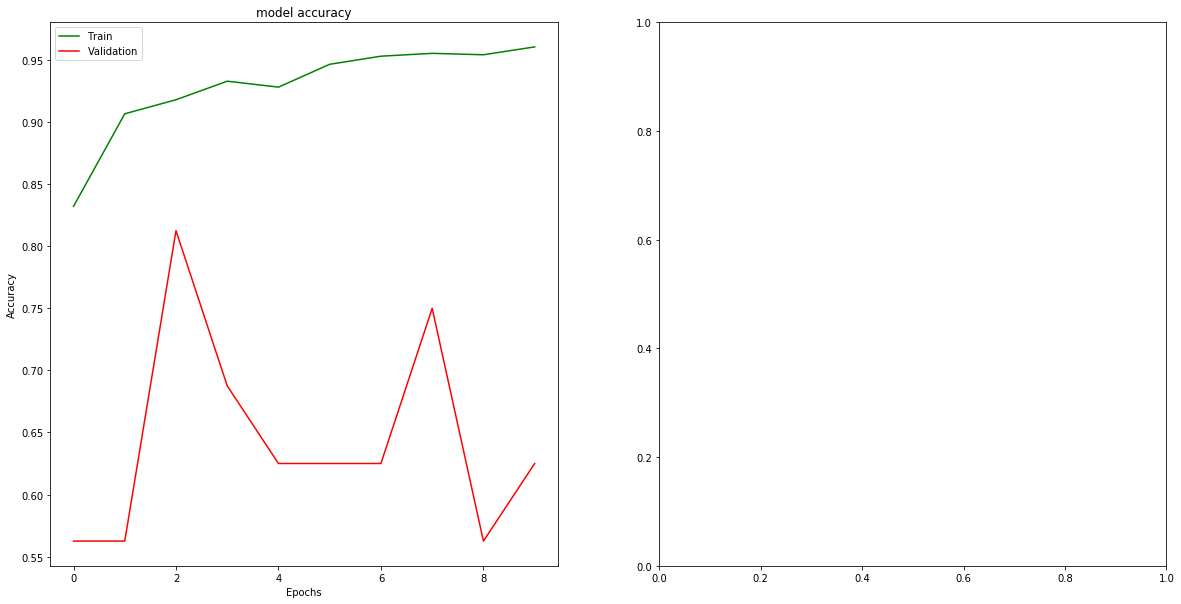

In [23]:
import matplotlib.pyplot as plt
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'g' , label = 'Train')
ax[0].plot(epochs , val_acc , 'r' , label = 'Validation')
ax[0].set_title('model accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
plt.show()

In [24]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 23s 1s/step
Test Accuracy: 84.46%
163/163 [==============================] - 217s 1s/step
Train Accuracy: 95.86%


In [26]:
model_json = model.to_json()
with open("first_model.json", "w") as json_file : 
    json_file.write(model_json)
model.save_weights("first_model.h5")
print("Saved model to disk")

Saved model to disk


# Second

In [7]:
model_2=Sequential()

#The first CNN layer followed by Relu and MaxPooling layers
model_2.add(Conv2D(32,(3,3),input_shape=(200,200,3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer followed by Relu and MaxPooling layers
model_2.add(Conv2D(64,(3,3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))


#The second convolution layer followed by Relu and MaxPooling layers
model_2.add(Conv2D(128,(3,3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

'''
#The Third convolution layer followed by Relu and MaxPooling layers
model_2.add(Conv2D(256,(3,3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
'''

#Flatten layer to stack the output convolutions from convolution layer
model_2.add(Flatten())

#Dense layer of 256 neurons
model_2.add(Dense(128,activation='relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(1,activation='sigmoid'))
#The Final layer with two outputs for two categories

model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 97, 97, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 128)      

In [50]:
history = model.fit_generator(
                    train_generator ,
                    epochs = 10,
                    validation_data = Validation_generator,
                    callbacks = [learning_rate_reduction])

Epoch 1/10
163/163 [==============================] - 406s 2s/step - loss: 0.1062 - accuracy: 0.9595 - val_loss: 0.5773 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 393s 2s/step - loss: 0.1061 - accuracy: 0.9595 - val_loss: 0.9821 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 392s 2s/step - loss: 0.1044 - accuracy: 0.9649 - val_loss: 0.6719 - val_accuracy: 0.6875

Epoch 00003: ReduceLROnPlateau reducing learning rate to 8.100000013655517e-06.
Epoch 4/10
163/163 [==============================] - 392s 2s/step - loss: 0.1022 - accuracy: 0.9632 - val_loss: 0.6981 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 385s 2s/step - loss: 0.1079 - accuracy: 0.9578 - val_loss: 0.8800 - val_accuracy: 0.7500

Epoch 00005: ReduceLROnPlateau reducing learning rate to 2.429999949526973e-06.
Epoch 6/10
163/163 [==============================] - 416s 3s/step - loss: 0.1021 - accuracy: 0.9628 - val_loss: 0.9290 - v

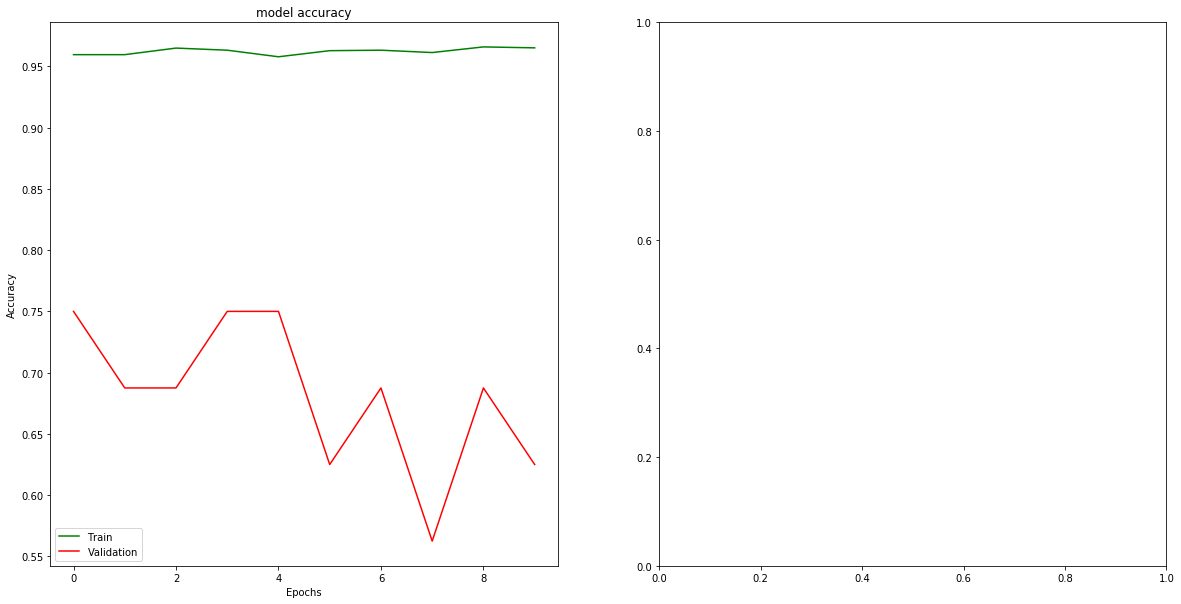

In [51]:
import matplotlib.pyplot as plt
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'g' , label = 'Train')
ax[0].plot(epochs , val_acc , 'r' , label = 'Validation')
ax[0].set_title('model accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
plt.show()

In [52]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 21s 1s/step
Test Accuracy: 85.90%
163/163 [==============================] - 202s 1s/step
Train Accuracy: 96.51%


In [53]:
model_json = model.to_json()
with open("second_model.json", "w") as json_file : 
    json_file.write(model_json)
model.save_weights("second_model.h5")
print("Saved model to disk")

Saved model to disk


# Third

In [10]:
history_3 = model_2.fit_generator(
                    train_generator ,
                    epochs = 10,
                    validation_data = Validation_generator,
                    callbacks = [learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
163/163 [==============================] - 338s 2s/step - loss: 0.4045 - accuracy: 0.8263 - val_loss: 1.3666 - val_accuracy: 0.5625
Epoch 2/10
163/163 [==============================] - 324s 2s/step - loss: 0.2497 - accuracy: 0.8957 - val_loss: 0.8970 - val_accuracy: 0.7500
Epoch 3/10
163/163 [==============================] - 322s 2s/step - loss: 0.2449 - accuracy: 0.9061 - val_loss: 0.6424 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 346s 2s/step - loss: 0.2134 - accuracy: 0.9122 - val_loss: 0.9843 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 370s 2s/step - loss: 0.2033 - accuracy: 0.9208 - val_loss: 1.4338 - val_accuracy: 0.6875

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 6/10
163/163 [==============================] - 345s 2s/step - loss: 0.1800 - accuracy: 0.9283 - val_loss: 1.1502 - val_accuracy: 0.6250
Epoch 7/10
16

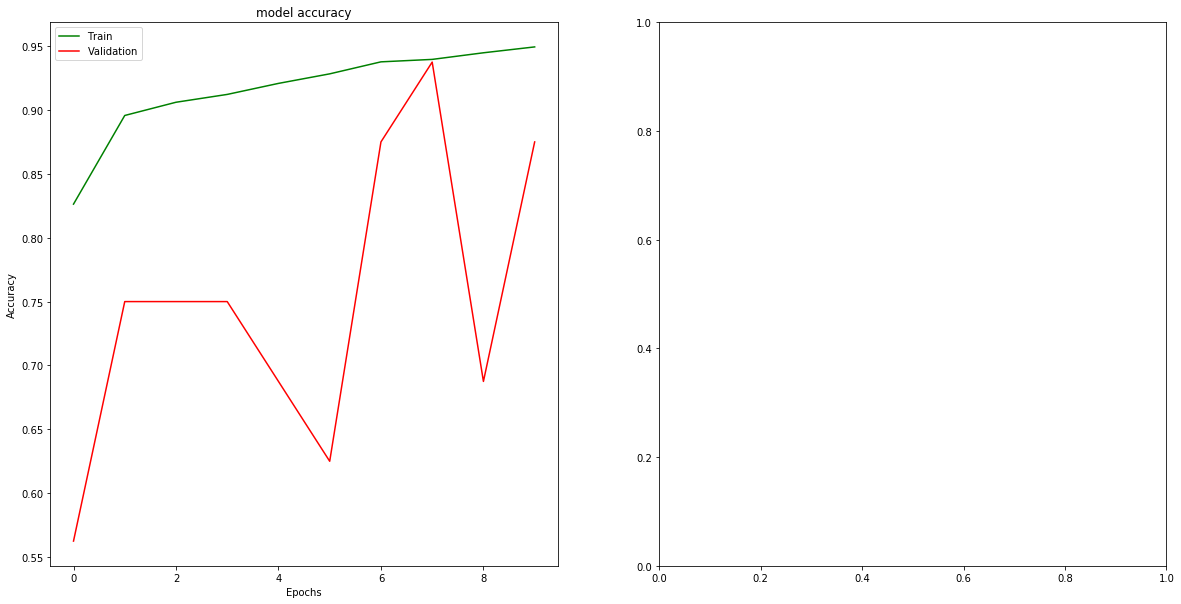

In [13]:
import matplotlib.pyplot as plt
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history_3.history['accuracy']
train_loss = history_3.history['loss']
val_acc = history_3.history['val_accuracy']
val_loss = history_3.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'g' , label = 'Train')
ax[0].plot(epochs , val_acc , 'r' , label = 'Validation')
ax[0].set_title('model accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
plt.show()

In [12]:
evaluation = model_2.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model_2.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 19s 971ms/step
Test Accuracy: 83.01%
163/163 [==============================] - 176s 1s/step
Train Accuracy: 95.74%


# Fourth

In [14]:
history_4 = model_2.fit_generator(
                    train_generator ,
                    epochs = 15,
                    validation_data = Validation_generator,
                    callbacks = [learning_rate_reduction])

Epoch 1/15
163/163 [==============================] - 324s 2s/step - loss: 0.1287 - accuracy: 0.9513 - val_loss: 0.8117 - val_accuracy: 0.7500
Epoch 2/15
163/163 [==============================] - 320s 2s/step - loss: 0.1365 - accuracy: 0.9507 - val_loss: 0.7863 - val_accuracy: 0.7500
Epoch 3/15
163/163 [==============================] - 318s 2s/step - loss: 0.1384 - accuracy: 0.9477 - val_loss: 0.6135 - val_accuracy: 0.7500
Epoch 4/15
163/163 [==============================] - 326s 2s/step - loss: 0.1304 - accuracy: 0.9540 - val_loss: 0.5300 - val_accuracy: 0.7500
Epoch 5/15
163/163 [==============================] - 321s 2s/step - loss: 0.1295 - accuracy: 0.9538 - val_loss: 1.2124 - val_accuracy: 0.6250
Epoch 6/15
163/163 [==============================] - 319s 2s/step - loss: 0.1247 - accuracy: 0.9565 - val_loss: 0.7938 - val_accuracy: 0.7500

Epoch 00006: ReduceLROnPlateau reducing learning rate to 2.700000040931627e-05.
Epoch 7/15
163/163 [==============================] - 319s 2s

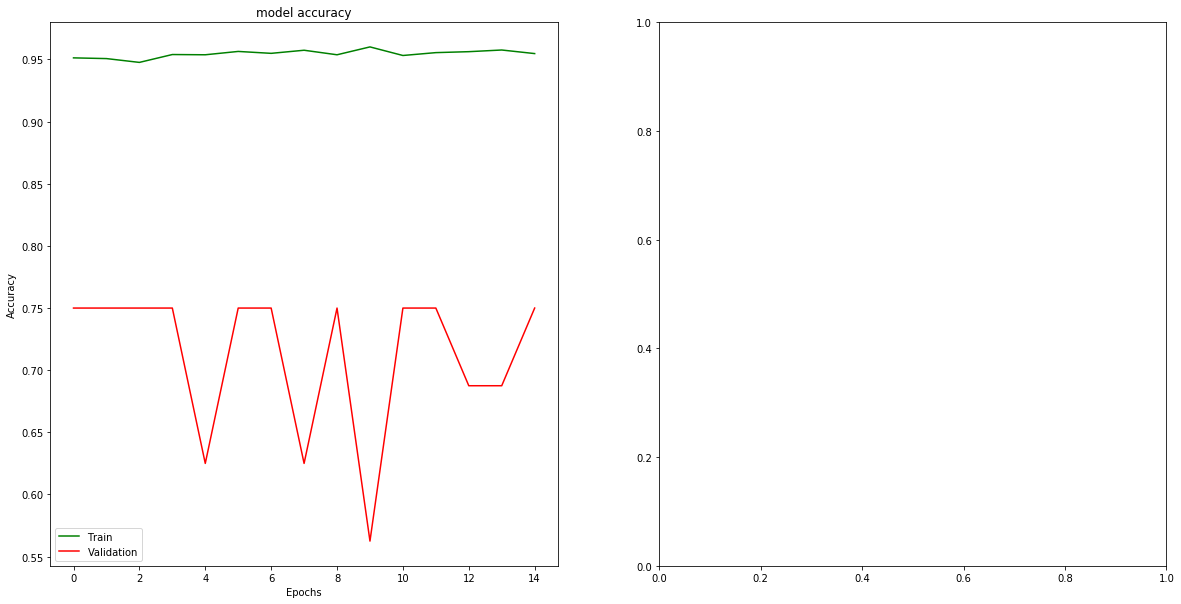

In [17]:
import matplotlib.pyplot as plt
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = history_4.history['accuracy']
train_loss = history_4.history['loss']
val_acc = history_4.history['val_accuracy']
val_loss = history_4.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'g' , label = 'Train')
ax[0].plot(epochs , val_acc , 'r' , label = 'Validation')
ax[0].set_title('model accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
plt.show()

In [18]:
evaluation = model_2.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model_2.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 21s 1s/step
Test Accuracy: 85.90%
163/163 [==============================] - 184s 1s/step
Train Accuracy: 96.40%


In [20]:
model_json = model_2.to_json()
with open("fourth_model.json", "w") as json_file : 
    json_file.write(model_json)
model_2.save_weights("fourth_model.h5")
print("Saved model to disk")

Saved model to disk


# Fifth

In [10]:
history_5 = model_2.fit_generator(
                    train_generator ,
                    epochs = 7,
                    validation_data = Validation_generator,
                    callbacks = [learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/7
163/163 [==============================] - 327s 2s/step - loss: 0.3854 - accuracy: 0.8342 - val_loss: 0.7377 - val_accuracy: 0.5000
Epoch 2/7
163/163 [==============================] - 323s 2s/step - loss: 0.2565 - accuracy: 0.8907 - val_loss: 1.3531 - val_accuracy: 0.6250
Epoch 3/7
163/163 [==============================] - 325s 2s/step - loss: 0.2308 - accuracy: 0.9086 - val_loss: 1.5658 - val_accuracy: 0.6250

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/7
163/163 [==============================] - 324s 2s/step - loss: 0.1971 - accuracy: 0.9237 - val_loss: 1.0039 - val_accuracy: 0.7500
Epoch 5/7
163/163 [==============================] - 326s 2s/step - loss: 0.1742 - accuracy: 0.9310 - val_loss: 0.6968 - val_accuracy: 0.6875
Epoch 6/7
163/163 [==============================] - 325s 2s/step - loss: 0.1712 - accuracy: 0.9348 - val_loss: 1.2030 - val_accuracy: 0.6250
Epoch 7/7
163/163 [

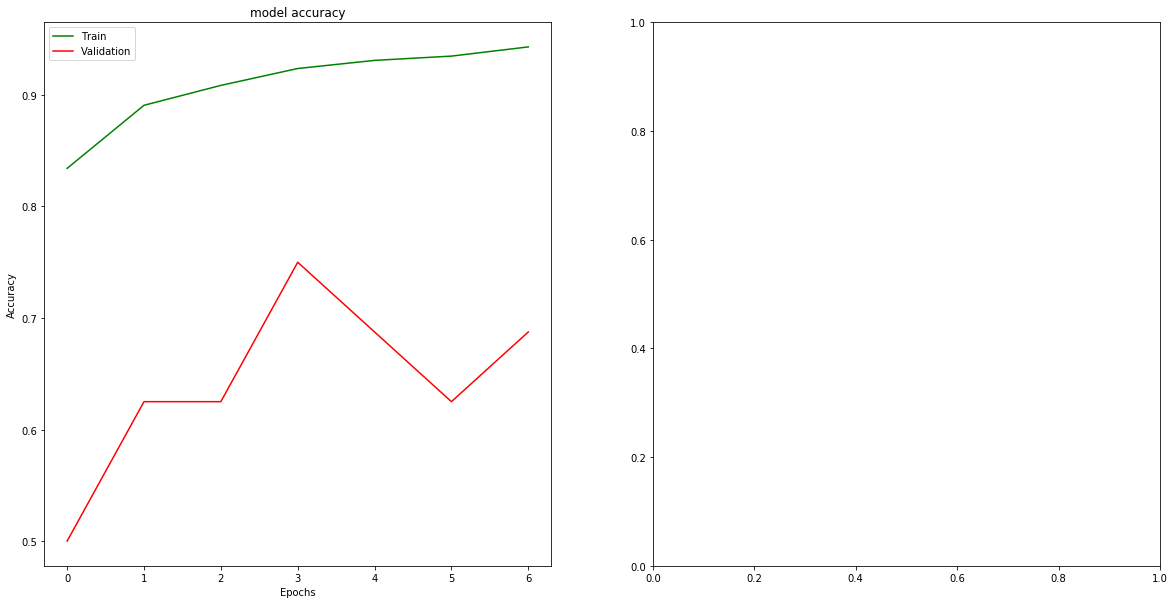

In [14]:
import matplotlib.pyplot as plt
epochs = [i for i in range(7)]
fig , ax = plt.subplots(1,2)
train_acc = history_5.history['accuracy']
train_loss = history_5.history['loss']
val_acc = history_5.history['val_accuracy']
val_loss = history_5.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'g' , label = 'Train')
ax[0].plot(epochs , val_acc , 'r' , label = 'Validation')
ax[0].set_title('model accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
plt.show()

In [15]:
evaluation = model_2.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model_2.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 19s 965ms/step
Test Accuracy: 84.46%
163/163 [==============================] - 184s 1s/step
Train Accuracy: 94.46%


In [16]:
history_5 = model_2.fit_generator(
                    train_generator ,
                    epochs = 1,
                    validation_data = Validation_generator,
                    callbacks = [learning_rate_reduction])

Epoch 1/1
163/163 [==============================] - 332s 2s/step - loss: 0.1404 - accuracy: 0.9490 - val_loss: 0.8401 - val_accuracy: 0.6875


In [17]:
history_5 = model_2.fit_generator(
                    train_generator ,
                    epochs = 1,
                    validation_data = Validation_generator,
                    callbacks = [learning_rate_reduction])

Epoch 1/1
163/163 [==============================] - 328s 2s/step - loss: 0.1328 - accuracy: 0.9496 - val_loss: 0.8586 - val_accuracy: 0.7500


In [21]:
evaluation = model_2.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model_2.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 19s 936ms/step
Test Accuracy: 82.53%
163/163 [==============================] - 190s 1s/step
Train Accuracy: 95.25%


# Sixth

In [6]:
model=Sequential()

#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(32,(3,3),input_shape=(200,200,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#The Third convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#Flatten layer to stack the output convolutions from convolution layer
model.add(Flatten())

#Dense layer of 256 neurons
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# ReduceLROnPlateau reduces Learning rate when there is no change in the parameter passed in moniter
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='auto')

In [8]:
history = model.fit_generator(
                    train_generator ,
                    epochs = 7,
                    validation_data = Validation_generator,
                    callbacks = [learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/7
163/163 [==============================] - 372s 2s/step - loss: 0.3983 - accuracy: 0.8303 - val_loss: 0.5247 - val_accuracy: 0.8750
Epoch 2/7
163/163 [==============================] - 367s 2s/step - loss: 0.2452 - accuracy: 0.9045 - val_loss: 0.3286 - val_accuracy: 0.8750
Epoch 3/7
163/163 [==============================] - 373s 2s/step - loss: 0.2025 - accuracy: 0.9199 - val_loss: 0.9603 - val_accuracy: 0.5625
Epoch 4/7
163/163 [==============================] - 359s 2s/step - loss: 0.1998 - accuracy: 0.9185 - val_loss: 0.9815 - val_accuracy: 0.6875

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/7
163/163 [==============================] - 352s 2s/step - loss: 0.1521 - accuracy: 0.9423 - val_loss: 0.7111 - val_accuracy: 0.6875
Epoch 6/7
163/163 [==============================] - 341s 2s/step - loss: 0.1482 - accuracy: 0.9452 - val_loss: 0.7497 - val_accuracy: 0.5625

Epoch 00006: Reduc

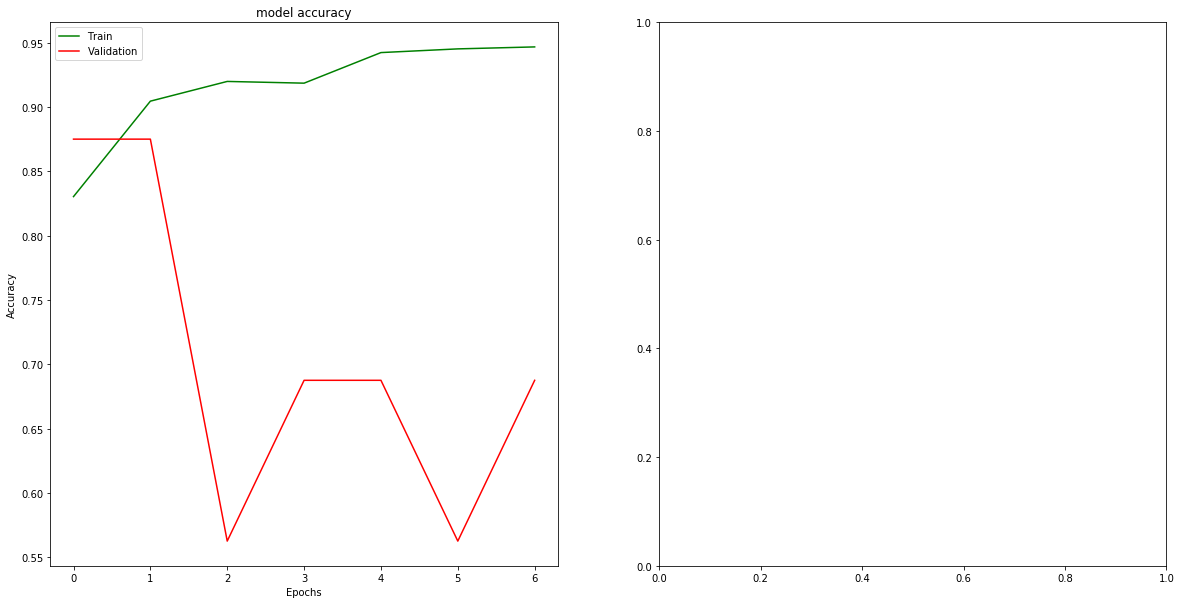

In [10]:
import matplotlib.pyplot as plt
epochs = [i for i in range(7)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'g' , label = 'Train')
ax[0].plot(epochs , val_acc , 'r' , label = 'Validation')
ax[0].set_title('model accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
plt.show()

In [11]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 20s 1s/step
Test Accuracy: 85.90%
163/163 [==============================] - 199s 1s/step
Train Accuracy: 95.17%


In [12]:
model_json = model.to_json()
with open("sixth_model.json", "w") as json_file : 
    json_file.write(model_json)
model.save_weights("sixth_model.h5")
print("Saved model to disk")

Saved model to disk


# Seventh

In [7]:
model_3=Sequential()

#The first CNN layer followed by Relu and MaxPooling layers
model_3.add(Conv2D(32,(3,3),input_shape=(200,200,3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer followed by Relu and MaxPooling layers
model_3.add(Conv2D(64,(3,3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))


#The second convolution layer followed by Relu and MaxPooling layers
model_3.add(Conv2D(128,(3,3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.5))


#The Third convolution layer followed by Relu and MaxPooling layers
model_3.add(Conv2D(256,(3,3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))


#Flatten layer to stack the output convolutions from convolution layer
model_3.add(Flatten())

#Dense layer of 256 neurons
model_3.add(Dense(256,activation='relu'))
model_3.add(Dropout(0.5))

model_3.add(Dense(1,activation='sigmoid'))
#The Final layer with two outputs for two categories

model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
history_3 = model_3.fit_generator(
                    train_generator ,
                    epochs = 15,
                    validation_data = Validation_generator,
                    callbacks = [learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
163/163 [==============================] - 408s 3s/step - loss: 0.5273 - accuracy: 0.7770 - val_loss: 0.6805 - val_accuracy: 0.6250
Epoch 2/15
163/163 [==============================] - 374s 2s/step - loss: 0.2842 - accuracy: 0.8844 - val_loss: 1.2258 - val_accuracy: 0.6250
Epoch 3/15
163/163 [==============================] - 368s 2s/step - loss: 0.2315 - accuracy: 0.9057 - val_loss: 0.4661 - val_accuracy: 0.8125
Epoch 4/15
163/163 [==============================] - 367s 2s/step - loss: 0.2132 - accuracy: 0.9099 - val_loss: 0.7426 - val_accuracy: 0.7500
Epoch 5/15
163/163 [==============================] - 366s 2s/step - loss: 0.1928 - accuracy: 0.9233 - val_loss: 0.7392 - val_accuracy: 0.6875

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 6/15
163/163 [==============================] - 366s 2s/step - loss: 0.1649 - accuracy: 0.9375 - val_loss: 0.7577 - val_accuracy: 0.6875
Epoch 7/15
16

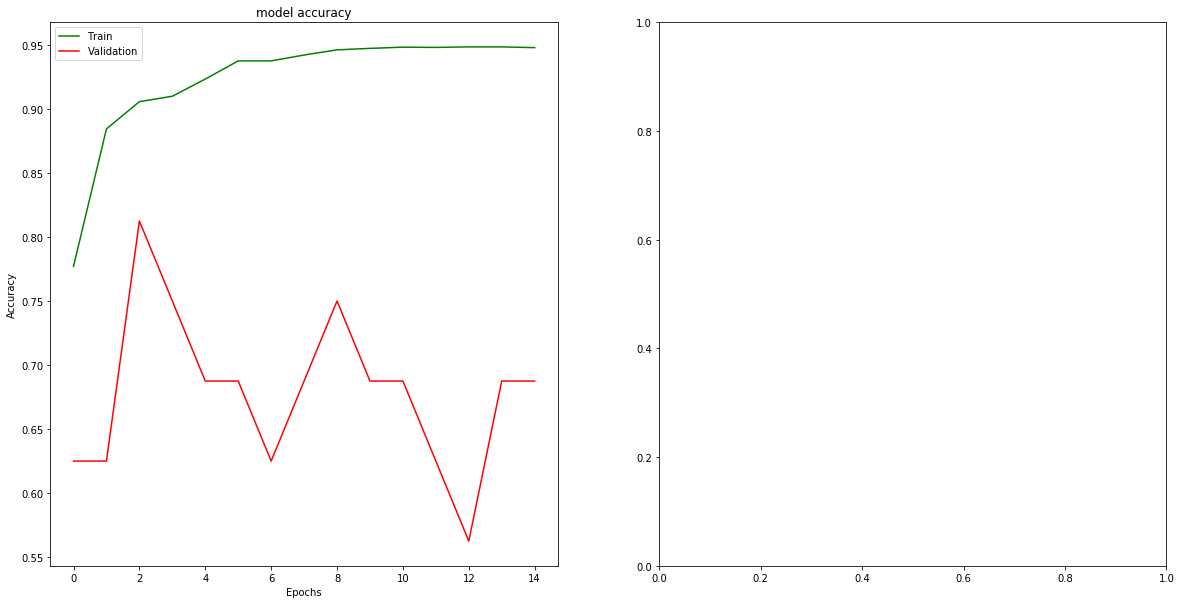

In [11]:
import matplotlib.pyplot as plt
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = history_3.history['accuracy']
train_loss = history_3.history['loss']
val_acc = history_3.history['val_accuracy']
val_loss = history_3.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'g' , label = 'Train')
ax[0].plot(epochs , val_acc , 'r' , label = 'Validation')
ax[0].set_title('model accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
plt.show()

In [12]:
evaluation = model_3.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model_3.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 21s 1s/step
Test Accuracy: 87.02%
163/163 [==============================] - 197s 1s/step
Train Accuracy: 95.71%


In [14]:
model_json = model_3.to_json()
with open("seventh_model.json", "w") as json_file : 
    json_file.write(model_json)
model_3.save_weights("seventh_model.h5")
print("Saved model to disk")

Saved model to disk


# Eighth

In [8]:
model_4=Sequential()

#The first CNN layer followed by Relu and MaxPooling layers
model_4.add(Conv2D(32,(3,3),input_shape=(200,200,3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer followed by Relu and MaxPooling layers
model_4.add(Conv2D(64,(3,3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.3))


#The second convolution layer followed by Relu and MaxPooling layers
model_4.add(Conv2D(128,(3,3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))


#The Third convolution layer followed by Relu and MaxPooling layers
model_4.add(Conv2D(256,(3,3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.3))


#Flatten layer to stack the output convolutions from convolution layer
model_4.add(Flatten())

#Dense layer of 256 neurons
model_4.add(Dense(256,activation='relu'))
model_4.add(Dropout(0.5))

model_4.add(Dense(1,activation='sigmoid'))
#The Final layer with two outputs for two categories

model_4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 97, 97, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)       

In [14]:
history_4 = model_4.fit_generator(
                    train_generator ,
                    epochs = 20,
                    validation_data = Validation_generator,
                    callbacks = [learning_rate_reduction])

Epoch 1/20
163/163 [==============================] - 367s 2s/step - loss: 0.4421 - accuracy: 0.7945 - val_loss: 0.9874 - val_accuracy: 0.6875
Epoch 2/20
163/163 [==============================] - 367s 2s/step - loss: 0.2703 - accuracy: 0.8875 - val_loss: 1.4609 - val_accuracy: 0.6875
Epoch 3/20
163/163 [==============================] - 365s 2s/step - loss: 0.2342 - accuracy: 0.9039 - val_loss: 0.5806 - val_accuracy: 0.7500
Epoch 4/20
163/163 [==============================] - 369s 2s/step - loss: 0.2063 - accuracy: 0.9170 - val_loss: 0.7952 - val_accuracy: 0.5625
Epoch 5/20
163/163 [==============================] - 381s 2s/step - loss: 0.1920 - accuracy: 0.9277 - val_loss: 0.5555 - val_accuracy: 0.6875
Epoch 6/20
163/163 [==============================] - 357s 2s/step - loss: 0.1747 - accuracy: 0.9329 - val_loss: 0.7542 - val_accuracy: 0.7500
Epoch 7/20
163/163 [==============================] - 357s 2s/step - loss: 0.1813 - accuracy: 0.9268 - val_loss: 0.3140 - val_accuracy: 0.8125

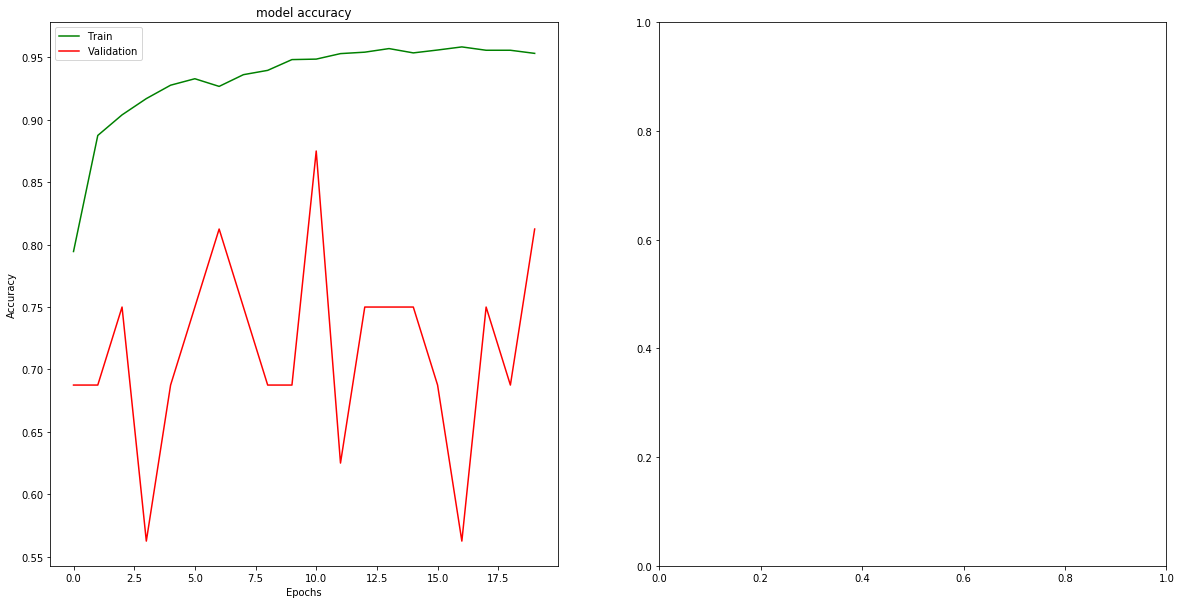

In [15]:
import matplotlib.pyplot as plt
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history_4.history['accuracy']
train_loss = history_4.history['loss']
val_acc = history_4.history['val_accuracy']
val_loss = history_4.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'g' , label = 'Train')
ax[0].plot(epochs , val_acc , 'r' , label = 'Validation')
ax[0].set_title('model accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
plt.show()

In [16]:
evaluation = model_4.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model_4.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 21s 1s/step
Test Accuracy: 89.10%
163/163 [==============================] - 183s 1s/step
Train Accuracy: 96.15%


In [17]:
model_json = model_4.to_json()
with open("eighth_model.json", "w") as json_file : 
    json_file.write(model_json)
model_4.save_weights("eighth_model.h5")
print("Saved model to disk")

Saved model to disk


In [8]:
history_4 = model_4.fit_generator(
                    train_generator ,
                    epochs = 25,
                    validation_data = Validation_generator,
                    callbacks = [learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
163/163 [==============================] - 382s 2s/step - loss: 0.3950 - accuracy: 0.8238 - val_loss: 1.0820 - val_accuracy: 0.5000
Epoch 2/25
163/163 [==============================] - 370s 2s/step - loss: 0.2557 - accuracy: 0.8909 - val_loss: 0.8125 - val_accuracy: 0.5625
Epoch 3/25
163/163 [==============================] - 367s 2s/step - loss: 0.2084 - accuracy: 0.9155 - val_loss: 0.5417 - val_accuracy: 0.8125
Epoch 4/25
163/163 [==============================] - 366s 2s/step - loss: 0.1957 - accuracy: 0.9229 - val_loss: 0.5690 - val_accuracy: 0.7500
Epoch 5/25
163/163 [==============================] - 366s 2s/step - loss: 0.1804 - accuracy: 0.9300 - val_loss: 0.9723 - val_accuracy: 0.5625

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 6/25
163/163 [==============================] - 365s 2s/step - loss: 0.1597 - accuracy: 0.9356 - val_loss: 1.1603 - val_accuracy: 0.5625
Epoch 7/25
16

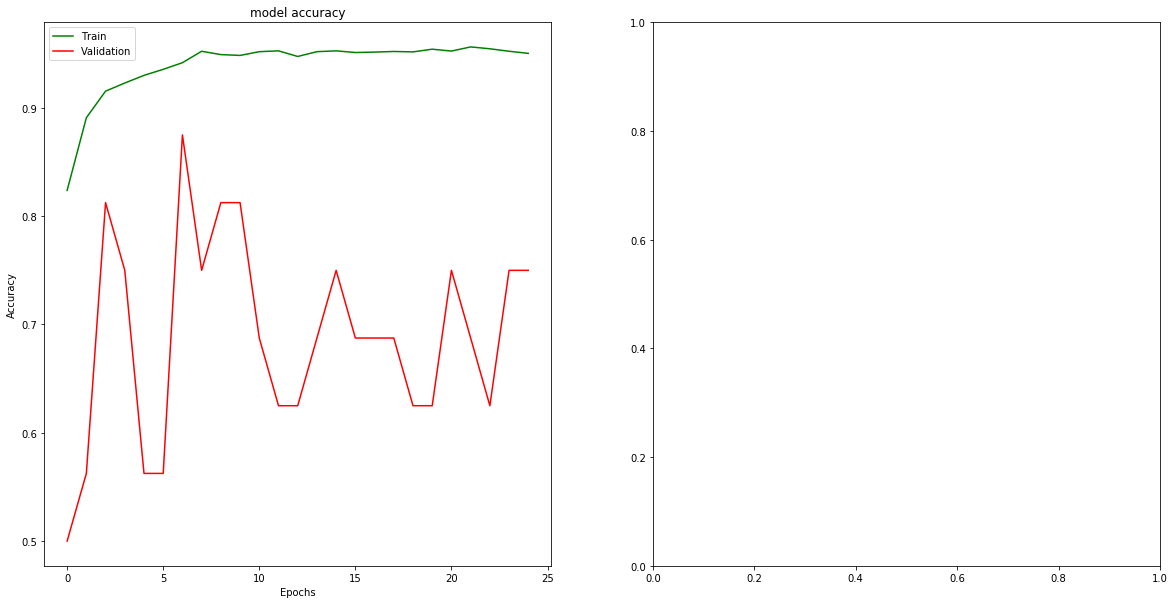

In [11]:
import matplotlib.pyplot as plt
epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history_4.history['accuracy']
train_loss = history_4.history['loss']
val_acc = history_4.history['val_accuracy']
val_loss = history_4.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'g' , label = 'Train')
ax[0].plot(epochs , val_acc , 'r' , label = 'Validation')
ax[0].set_title('model accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
plt.show()

In [10]:
evaluation = model_4.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model_4.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 23s 1s/step
Test Accuracy: 85.58%
163/163 [==============================] - 194s 1s/step
Train Accuracy: 95.59%


In [12]:
#Loaded model
from keras.models import model_from_json
json_file = open("eighth_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("eighth_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [13]:
loaded_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
evaluation = loaded_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0] * 100:.2f}%")

evaluation = loaded_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")


20/20 [==============================] - 23s 1s/step
Test Loss: 5.27%
20/20 [==============================] - 23s 1s/step
Test Accuracy: 87.98%


In [28]:
evaluation = loaded_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0] * 100:.2f}%")

evaluation = loaded_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")


20/20 [==============================] - 23s 1s/step
Test Loss: 4.21%
20/20 [==============================] - 22s 1s/step
Test Accuracy: 87.18%


In [32]:
evaluation = loaded_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0] * 100:.2f}%")

evaluation = loaded_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")


20/20 [==============================] - 21s 1s/step
Test Loss: 8.58%
20/20 [==============================] - 22s 1s/step
Test Accuracy: 88.78%


In [41]:
evaluation = loaded_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0] * 100:.2f}%")

evaluation = loaded_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")


20/20 [==============================] - 22s 1s/step
Test Loss: 12.19%
20/20 [==============================] - 23s 1s/step
Test Accuracy: 87.82%


In [53]:
evaluation = loaded_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0] * 100:.2f}%")

evaluation = loaded_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")


20/20 [==============================] - 24s 1s/step
Test Loss: 11.45%
20/20 [==============================] - 26s 1s/step
Test Accuracy: 88.46%


In [57]:
evaluation = loaded_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0] * 100:.2f}%")

evaluation = loaded_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")


20/20 [==============================] - 26s 1s/step
Test Loss: 7.50%
20/20 [==============================] - 25s 1s/step
Test Accuracy: 87.02%


In [62]:
evaluation = loaded_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0] * 100:.2f}%")

evaluation = loaded_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")


20/20 [==============================] - 28s 1s/step
Test Loss: 1.52%
20/20 [==============================] - 28s 1s/step
Test Accuracy: 86.22%


In [72]:
evaluation = loaded_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0] * 100:.2f}%")

evaluation = loaded_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")


20/20 [==============================] - 24s 1s/step
Test Loss: 19.38%
20/20 [==============================] - 25s 1s/step
Test Accuracy: 88.94%


In [75]:
evaluation = loaded_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0] * 100:.2f}%")

evaluation = loaded_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")


20/20 [==============================] - 24s 1s/step
Test Loss: 3.89%
20/20 [==============================] - 24s 1s/step
Test Accuracy: 88.46%


In [37]:
evaluation = loaded_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0] * 100:.2f}%")
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 22s 1s/step
Test Loss: 0.37%
Test Accuracy: 87.98%


In [38]:
evaluation = loaded_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0] * 100:.2f}%")
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 23s 1s/step
Test Loss: 0.31%
Test Accuracy: 87.50%


In [39]:
evaluation = loaded_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0] * 100:.2f}%")
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 21s 1s/step
Test Loss: 1.22%
Test Accuracy: 87.66%


In [40]:
evaluation = loaded_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0] * 100:.2f}%")
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 22s 1s/step
Test Loss: 0.82%
Test Accuracy: 89.10%


In [45]:
evaluation = loaded_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0] * 100:.2f}%")
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

1/1 [==============================] - 37s 37s/step
Test Loss: 36.96%
Test Accuracy: 87.50%


In [46]:
evaluation = loaded_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0] * 100:.2f}%")
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

1/1 [==============================] - 28s 28s/step
Test Loss: 39.66%
Test Accuracy: 86.86%


In [11]:
def evaluate_predcitions(model, generator):
    predictions = model.predict_generator(generator=generator,
                                    steps=generator.samples/nBatches,
                                    max_queue_size=10,
                                    workers=1,
                                    use_multiprocessing=False,
                                    verbose=0)

In [14]:
evaluate_predcitions(loaded_model, test_generator)

NameError: name 'nBatches' is not defined